In [94]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd 
import yfinance as yf
import numpy as np
import datetime as dt
from pandas_profiling import ProfileReport
import seaborn as sns


In [95]:
data = pd.read_csv("..\data\coloane,-macau-air-quality.csv",)
data.date=pd.to_datetime(data.date)
data.index=data.date
data.pop('date')

data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
"""
mapper=dict(zip(list(data.columns),list(data.columns.map(str.strip))))
data.rename(columns=mapper)
"""
for c in data.columns:
    data[c]= pd.to_numeric(data[c], errors='coerce')
    

date
2021-03-01   2021-03-01
2021-02-01   2021-02-01
2021-02-02   2021-02-02
2021-02-03   2021-02-03
2021-02-04   2021-02-04
                ...    
2017-04-03   2017-04-03
2017-01-01   2017-01-01
2016-08-12   2016-08-12
2017-04-01   2017-04-01
2017-04-02   2017-04-02
Name: date, Length: 1467, dtype: datetime64[ns]

'\nmapper=dict(zip(list(data.columns),list(data.columns.map(str.strip))))\ndata.rename(columns=mapper)\n'

In [96]:
if False:
    ProfileReport(data)

<AxesSubplot:xlabel='date'>

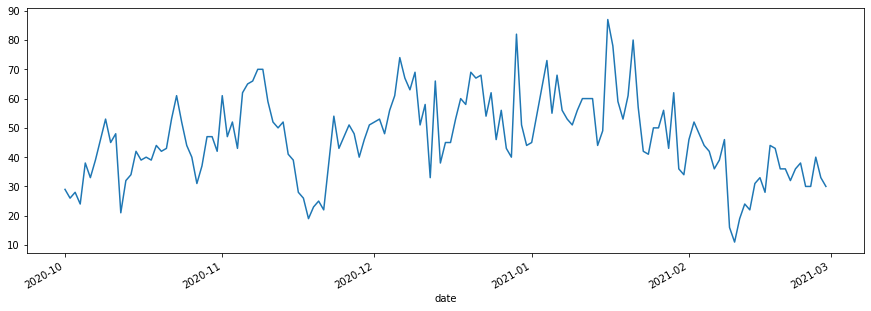

In [97]:
polluant='pm10'
fig,axs=plt.subplots(figsize=(15,5))
df = data[:150].copy()

df[polluant].plot(ax=axs)
pastpolluants=[]
for pol in data.columns:
    pastpolluants.append( 'past'+pol) 
    df[pastpolluants[-1]]=data[pol].shift(1)

In [98]:
df

,pm25,pm10,o3,no2,so2,co,pastpm25,pastpm10,pasto3,pastno2,pastso2,pastco
date,,,,,,,,,,,,
2021-03-01,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-01,58.0,46.0,73.0,13.0,3.0,6.0,54.0,NaN,NaN,NaN,NaN,NaN
2021-02-02,82.0,52.0,43.0,8.0,3.0,6.0,58.0,46.0,73.0,13.0,3.0,6.0
2021-02-03,81.0,48.0,44.0,10.0,3.0,5.0,82.0,52.0,43.0,8.0,3.0,6.0
2021-02-04,71.0,44.0,35.0,8.0,3.0,5.0,81.0,48.0,44.0,10.0,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-28,83.0,40.0,31.0,14.0,1.0,4.0,108.0,43.0,39.0,22.0,1.0,6.0
2020-12-29,79.0,82.0,33.0,16.0,2.0,7.0,83.0,40.0,31.0,14.0,1.0,4.0
2020-12-30,74.0,51.0,24.0,17.0,2.0,3.0,79.0,82.0,33.0,16.0,2.0,7.0


<AxesSubplot:xlabel='pastpm10', ylabel='pm10'>

<AxesSubplot:xlabel='pastpm10', ylabel='pm10'>

0.43369669396639765

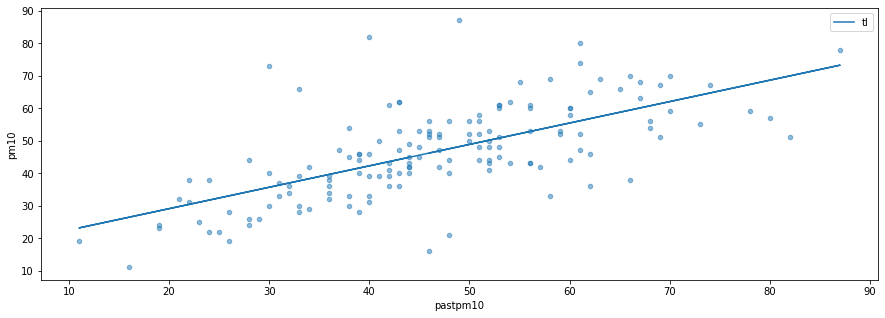

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#regression on past polluant features

fig,axs= plt.subplots(figsize=(20,10))
regr = linear_model.LinearRegression()
X= df[[pastpolluant,polluant]].dropna(how='any')
X.plot(kind='scatter',ax=axs, x = pastpolluant, y = polluant, figsize=(15,5), alpha =0.5)
y = X.pop(polluant)
regression = regr.fit(X.values.reshape(-1,1),y.values.reshape(-1,1))
trendln = pd.DataFrame({'tl':regression.predict(X.values.reshape(-1,1)).reshape(1,-1)[0]},index=X.values.reshape(1,-1)[0])
trendln.plot(ax=axs)

regression.score(X, y)


In [127]:
# regression on all past polluants 

regr = linear_model.LinearRegression()

#df[pastpolluants+[polluant]].head()
X= df[pastpolluants+[polluant]].dropna(how='any')
y= pd.DataFrame(X.pop(polluant))
#sns.pairplot(X[pastpolluants+[polluant]])

array([[ 0.12506886,  0.49053656, -0.01756564,  0.04346987, -1.51153175,
         0.15778857]])

0.4738635395079379

<AxesSubplot:xlabel='date'>

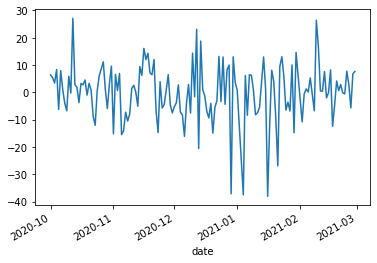

In [128]:
#X.plot(kind='scatter',ax=axs, x = pastpolluants, y =polluant, figsize=(15,5), alpha =0.5)
#y = X.pop(polluant)
regression = regr.fit(X.values,y.values.reshape(-1,1))
y['predicted'] = regression.predict(X.values).reshape(1,-1)[0]
#trendln.plot(ax=axs)
regression.coef_
regression.score(X, y[polluant])
(y['predicted']-y[polluant]).plot()